In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
import seaborn as sns

In [23]:
data = pd.read_csv("stock_data.csv", parse_dates=True, index_col=0)
data.head(5)

,MSFT,AMZN,KO,MA,COST,LUV,XOM,PFE,JPM,UNH,ACN,DIS,GILD,F,TSLA
Date,,,,,,,,,,,,,,,
2009-12-31,23.493395,134.520004,19.483227,24.065151,43.977592,10.604203,42.586098,10.716870,30.619154,25.254896,32.882641,28.090710,17.246176,6.968013,NaN
2010-01-04,23.855658,133.899994,19.496914,24.146002,44.155968,10.372269,43.185635,11.152852,31.524038,26.124914,33.334297,27.933922,17.258133,7.163116,NaN
2010-01-05,23.863367,134.690002,19.261057,24.074553,44.022186,10.919640,43.354256,10.993775,32.134663,26.083477,33.540306,27.864239,17.242193,7.636940,NaN
2010-01-06,23.716913,132.250000,19.254227,24.039745,44.594494,10.594928,43.728966,10.958426,32.311214,26.340338,33.896870,27.716162,17.840048,7.922629,NaN
2010-01-07,23.470270,130.000000,19.206366,23.882650,44.378941,10.752646,43.591564,10.917185,32.951271,27.351198,33.865173,27.724876,17.883890,8.124702,NaN


<AxesSubplot:>

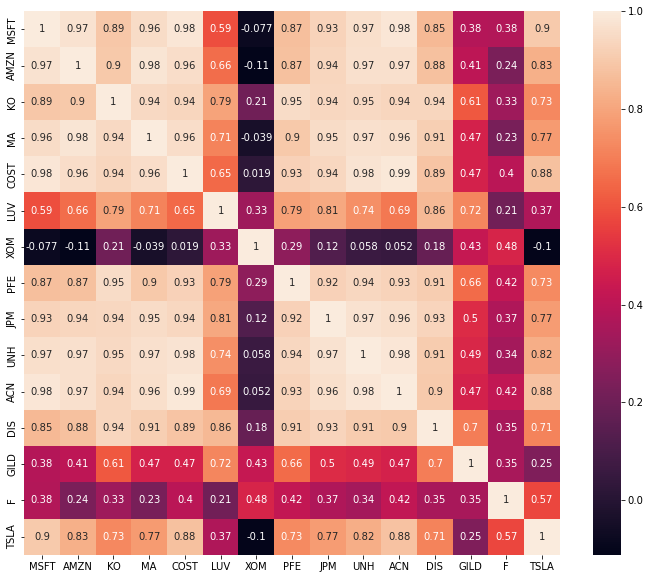

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:>

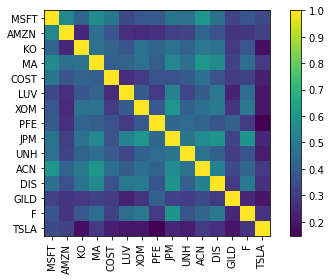

In [47]:
future_data = data.iloc[-1500:]
future_cov = risk_models.sample_cov(future_data)
sample_cov = risk_models.sample_cov(data)
plotting.plot_covariance(sample_cov, plot_correlation=True)

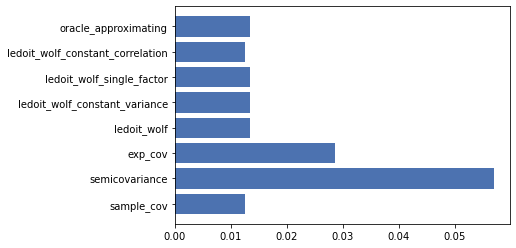

In [48]:
future_variance = np.diag(future_cov)
mean_abs_errors = []

risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov",
    "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating",
]

for method in risk_methods:
    S = risk_models.risk_matrix(df, method=method)
    variance = np.diag(S)
    mean_abs_errors.append(np.sum(np.abs(variance - future_variance)) / len(variance))
    
xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, risk_methods)
plt.show()

In [ ]:
We can see that the sample covariance matrix is a much better estimator of future variance compared to the other models. Its mean absolute error is 1%, which is actually pretty good. Let's visually compare the sample cov matrix to the realised future cov matrix:

<AxesSubplot:>

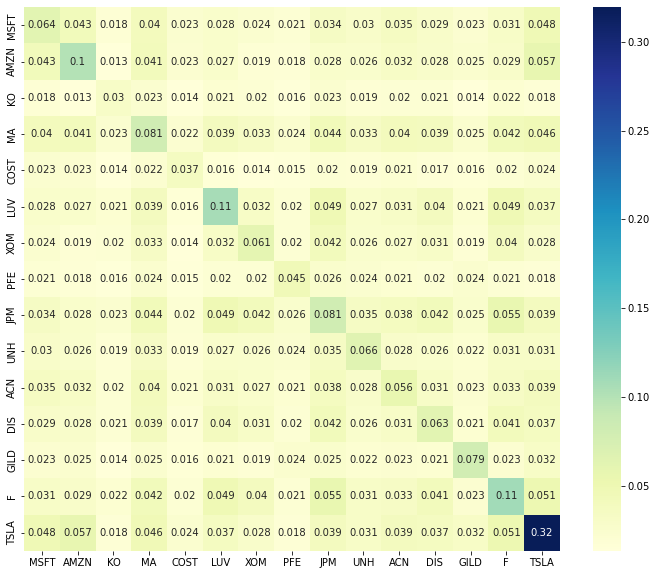

In [49]:
risk_matrix = risk_models.risk_matrix(data, method='sample_cov')
plt.figure(figsize=(12, 10))
sns.heatmap(risk_matrix, annot=True,cmap='YlGnBu')

In [50]:
expected_returns.mean_historical_return(data)

MSFT    0.233286
AMZN    0.299849
KO      0.097681
MA      0.245354
COST    0.231522
LUV     0.121878
XOM     0.055001
PFE     0.140162
JPM     0.134132
UNH     0.278350
ACN     0.207116
DIS     0.140878
GILD    0.107538
F       0.076706
TSLA    0.576416
dtype: float64

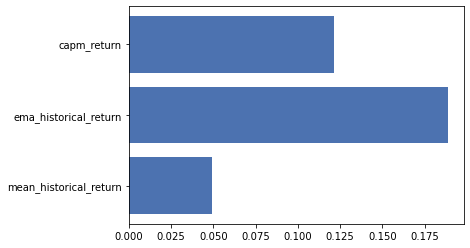

In [53]:
future_rets = expected_returns.mean_historical_return(future_data)
mean_abs_errors = []
return_methods = [
    "mean_historical_return",
    "ema_historical_return",
    "capm_return",
    ]

for method in return_methods:
    mu = expected_returns.return_model(data, method=method)
    mean_abs_errors.append(np.sum(np.abs(mu - future_rets)) / len(mu))
    
xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, return_methods)
plt.show()

In [54]:
print(mean_abs_errors)

[0.04911347470645829, 0.18869046409905785, 0.1213741205731763]


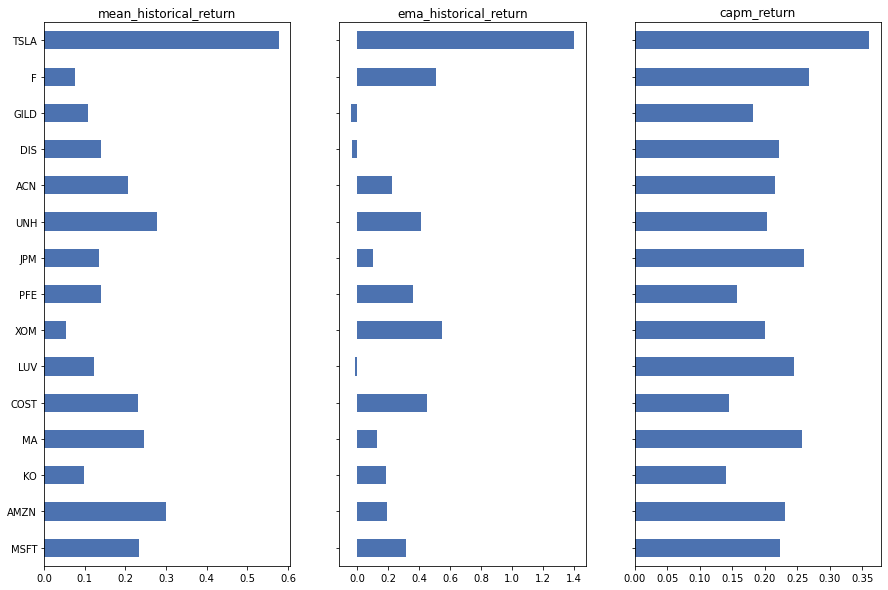

In [56]:
fig, axs = plt.subplots( 1, len(return_methods),sharey=True, figsize=(15,10))

for i, method in enumerate(return_methods):
    mu = expected_returns.return_model(data, method=method)
    axs[i].set_title(method)
    mu.plot.barh(ax=axs[i])